# Dataset 2

In [1]:
from helpers import *

In [2]:
DATA_ROOT_PATH = r"D:\master_thesis_wd\datasets\dataset2"
os.chdir(DATA_ROOT_PATH)
logging.basicConfig(level=logging.INFO,filename='dataset2.log', filemode='w', format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S')
IMAGES_PATH = r"./images"
RAW_LABELS_PATH = r"./raw_labels"
YOLO_LABELS_PATH = r"./yolo_labels"
if not os.path.exists(YOLO_LABELS_PATH):
    os.mkdir(YOLO_LABELS_PATH)

# EDA Dataset

### Images preview

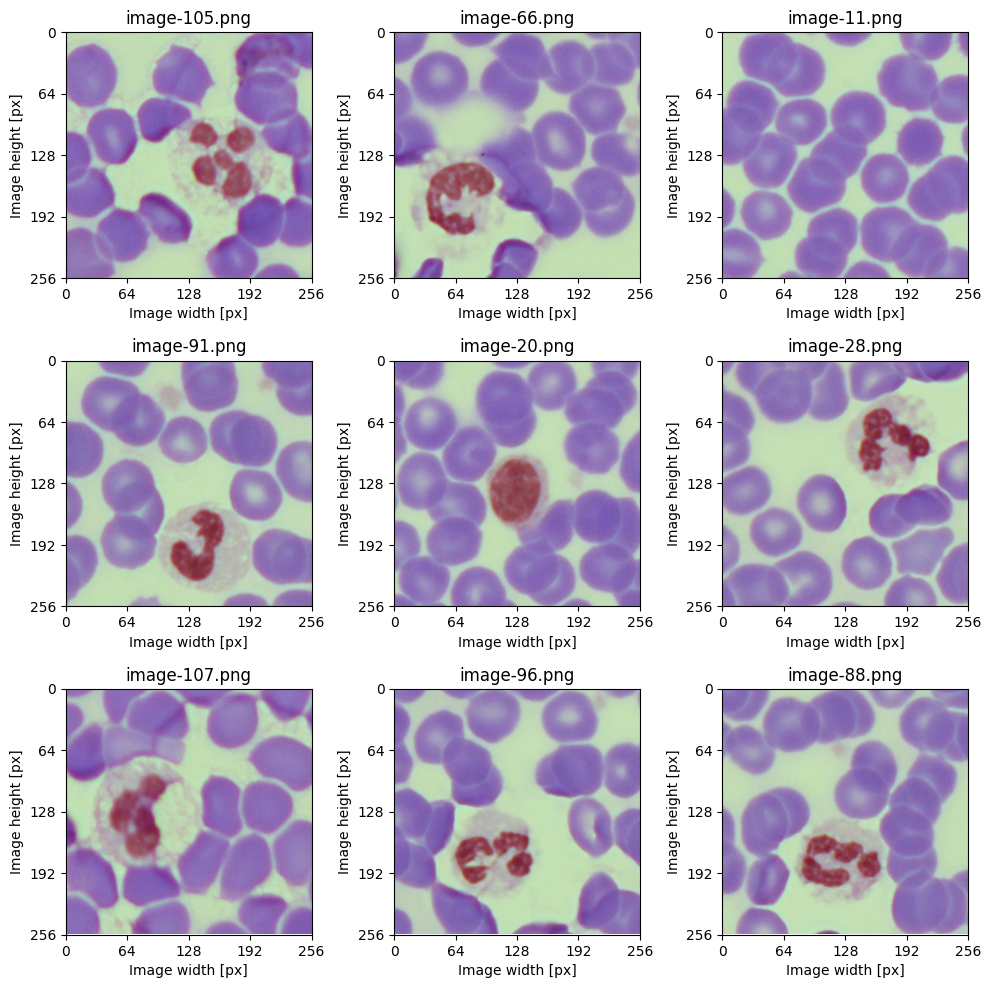

In [3]:
show_raw_images(IMAGES_PATH)

### Images insights 

In [4]:
all_images = [load_image(os.path.join(IMAGES_PATH, path)) for path in os.listdir(IMAGES_PATH)]
all_labels = [load_image(os.path.join(RAW_LABELS_PATH, path)) for path in os.listdir(RAW_LABELS_PATH)]


In [5]:
print("Number of images:", len(all_images))

Number of images: 100


In [6]:
print("Number of label files:", len(all_images))

Number of label files: 100


In [7]:
get_folder_size(IMAGES_PATH)

Dataset size: 12 [MB]


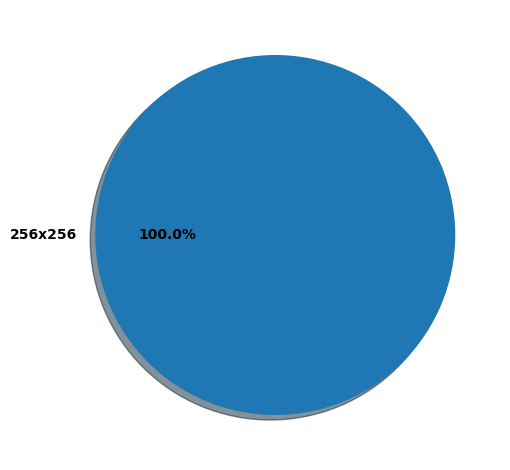

In [8]:
images_shape = list(map(lambda x: f"{x.shape[1]}x{x.shape[0]}", all_images))
pie_chart_from_list(images_shape)

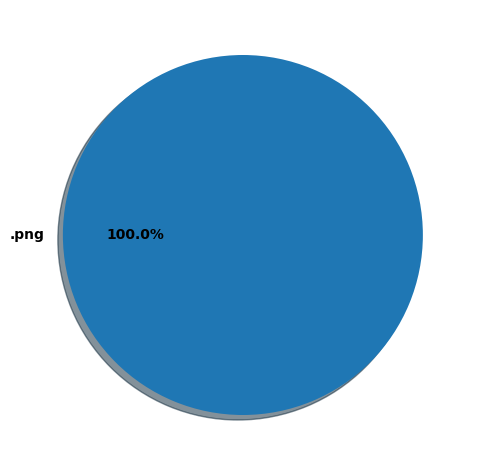

In [9]:
images_extension = list(map(lambda x: os.path.splitext(x)[1], os.listdir(IMAGES_PATH)))
pie_chart_from_list(images_extension)

### Raw labels insights

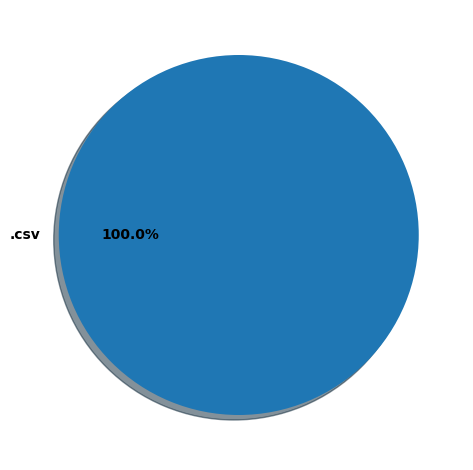

In [10]:
labels_extension = list(map(lambda x: os.path.splitext(x)[1], os.listdir(RAW_LABELS_PATH)))
pie_chart_from_list(labels_extension)

In [11]:
!tree images/ /F /A

Folder PATH listing for volume Dysk lokalny
Volume serial number is 0000005B 58D8:E3FB
D:\MASTER_THESIS_WD\DATASETS\DATASET2\IMAGES
    image-1.png
    image-10.png
    image-100.png
    image-101.png
    image-102.png
    image-103.png
    image-104.png
    image-105.png
    image-106.png
    image-107.png
    image-108.png
    image-109.png
    image-11.png
    image-110.png
    image-111.png
    image-112.png
    image-113.png
    image-114.png
    image-115.png
    image-116.png
    image-117.png
    image-118.png
    image-119.png
    image-12.png
    image-120.png
    image-14.png
    image-17.png
    image-18.png
    image-19.png
    image-2.png
    image-20.png
    image-21.png
    image-22.png
    image-23.png
    image-24.png
    image-25.png
    image-28.png
    image-30.png
    image-31.png
    image-32.png
    image-33.png
    image-34.png
    image-35.png
    image-36.png
    image-37.png
    image-38.png
    image-39.png
    image-4.png
    image-43.png
    image-44.png


In [12]:
!tree raw_labels /F /A

Folder PATH listing for volume Dysk lokalny
Volume serial number is 00000062 58D8:E3FB
D:\MASTER_THESIS_WD\DATASETS\DATASET2\RAW_LABELS
    annotations.csv
    
No subfolders exist 



In [13]:
with open(os.path.join(RAW_LABELS_PATH, "annotations.csv")) as f:
    print(f.read())

"image","xmin","ymin","xmax","ymax","label"
"image-100.png",0,0,25.190198366394398,40.81680280046674,"rbc"
"image-100.png",15.010501750291715,0,68.3372228704784,23.52742123687281,"rbc"
"image-100.png",25.017502917152857,16.02100350058343,78.37456242707117,73.73512252042006,"rbc"
"image-100.png",75.5659276546091,1.0618436406067677,140.2485414235706,45.59159859976663,"rbc"
"image-100.png",77.4830805134189,23.290548424737455,131.93698949824972,74.80630105017502,"rbc"
"image-100.png",136.24737456242707,10.938156359393231,188.27771295215868,69.97199533255542,"rbc"
"image-100.png",161.9276546091015,12.534422403733954,215.22170361726953,67.14585764294048,"rbc"
"image-100.png",217.13068844807466,4.381563593932322,255.99999999999997,63.47607934655775,"rbc"
"image-100.png",200.24387397899648,51.90665110851808,255.38039673278877,111.44340723453908,"rbc"
"image-100.png",147.6732788798133,67.33022170361727,201.90898483080514,122.57759626604434,"rbc"
"image-100.png",86.28354725787631,73.732788798133

### Raw labels - read and prepare 

In [14]:
raw_labels = pd.read_csv(
    os.path.join(RAW_LABELS_PATH, "annotations.csv"),
)
raw_labels = (
    raw_labels
    .rename(
        columns={
            "xmin": "x1",
            "ymin": "y1",
            "xmax": "x2",
            "ymax": "y2",
            "image": "img_name",
        }
    )
    .query('label == "wbc"')
    .reset_index(drop=True)
)
raw_labels["img_height"] = 256
raw_labels["img_width"] = 256
raw_labels["label"] = 0
raw_labels["img_name"] = raw_labels["img_name"].str.replace(".png", "")
raw_labels.head()

img_name          x1          y1          x2          y2  label  \
0  image-100  208.268378  191.901984  255.389732  253.438740      0   
1  image-100   89.589265  148.633606  158.634772  221.078180      0   
2  image-101   97.547258  105.493582  199.008168  216.887981      0   
3  image-102  128.788798  135.189032  211.809802  219.912485      0   
4    image-1   85.610268    2.334889  187.738623  120.068845      0   

   img_height  img_width  
0         256        256  
1         256        256  
2         256        256  
3         256        256  
4         256        256

## Parse raw label format to YOLO label format

In [15]:
yolo_labels = transform_labels_to_yolo_format(raw_labels)
yolo_labels.head()

img_name  label  x_center  y_center     width    height
0  image-100      0  0.905582  0.869806  0.184068  0.240378
1  image-100      0  0.484813  0.722093  0.269709  0.282987
2  image-101      0  0.579210  0.629651  0.396332  0.435134
3  image-102      0  0.665232  0.693558  0.324301  0.330951
4    image-1      0  0.533885  0.239070  0.398939  0.459898

In [16]:
yolo_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   img_name  103 non-null    object 
 1   label     103 non-null    int64  
 2   x_center  103 non-null    float64
 3   y_center  103 non-null    float64
 4   width     103 non-null    float64
 5   height    103 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ KB


### Save yolo labels inside dataset

In [17]:
save_yolo_labels(yolo_labels, YOLO_LABELS_PATH)

100%|████████████████████████████████████████████████████████████████████████████████| 97/97 [00:00<00:00, 1542.41it/s]


# Preview of images from dataset1 with labels

In [18]:
label_map = {"0": "wbc"}

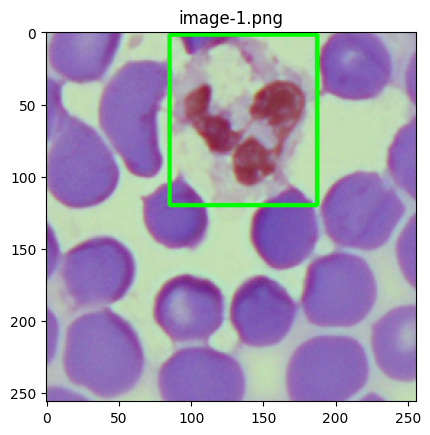

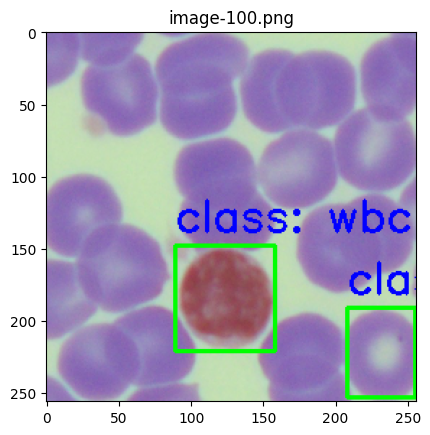

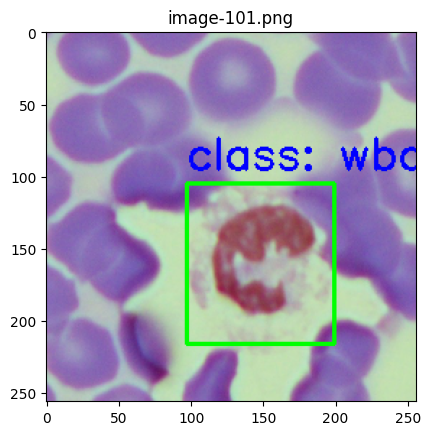

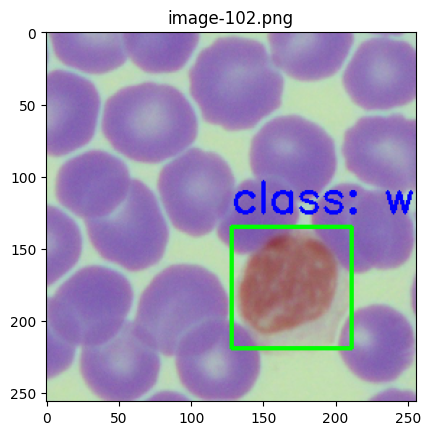

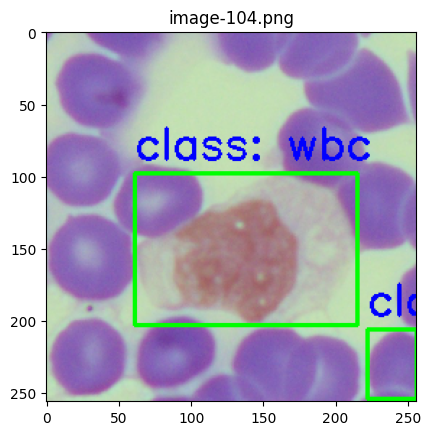

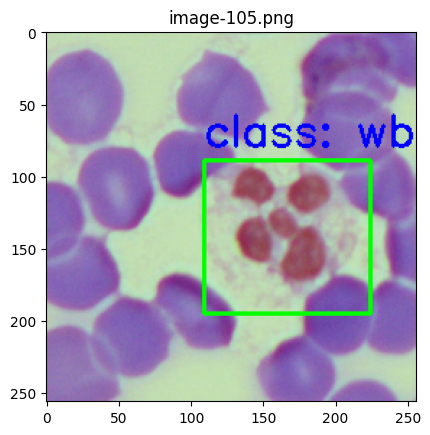

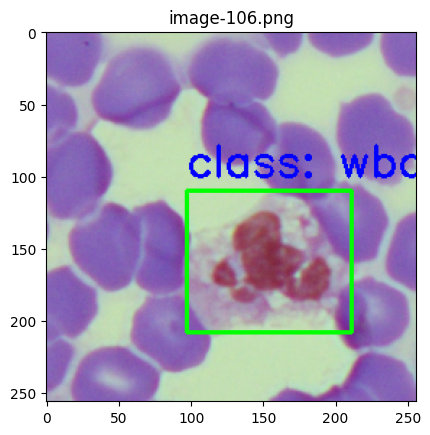

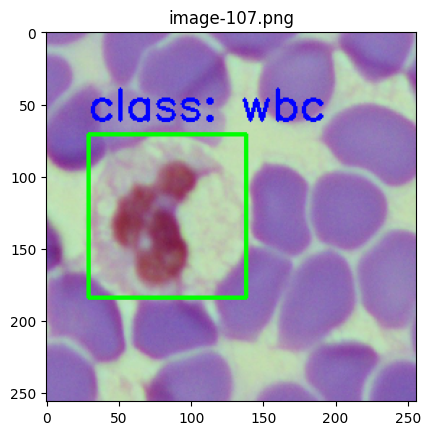

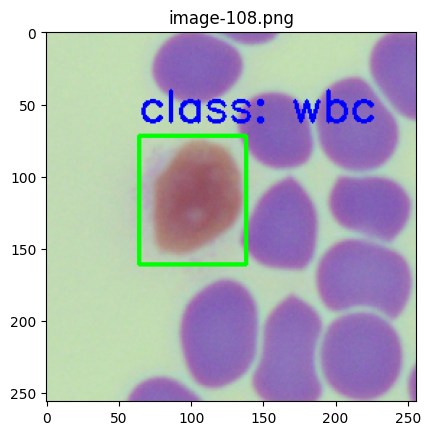

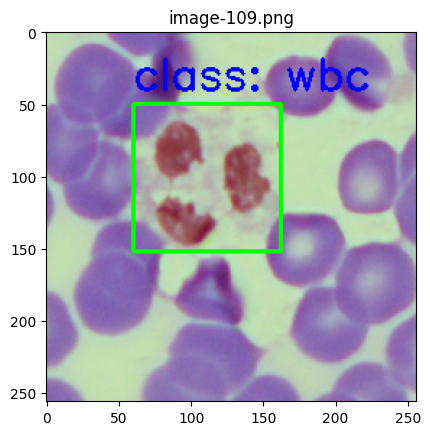

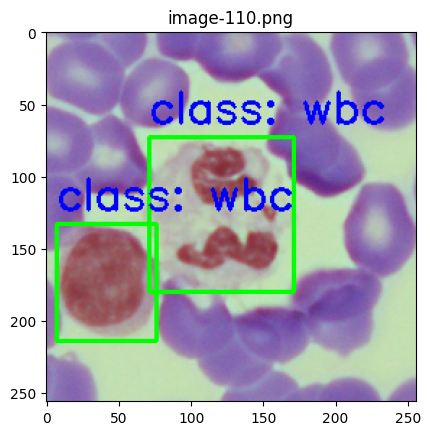

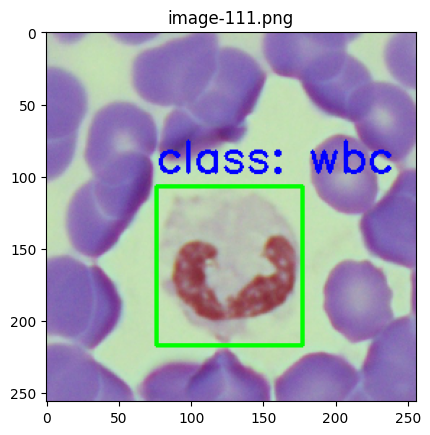

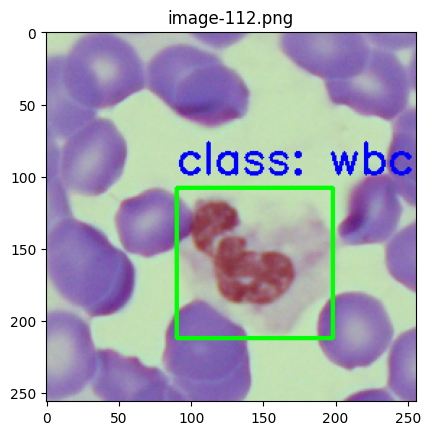

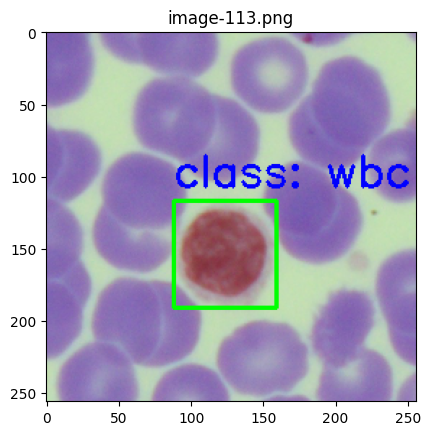

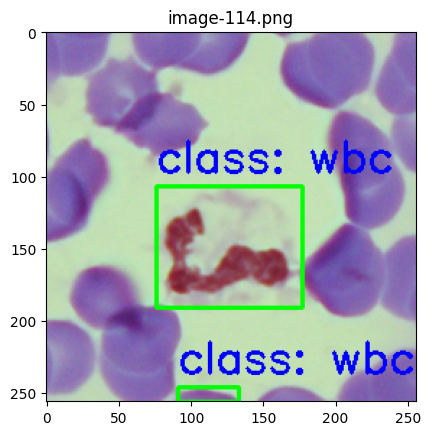

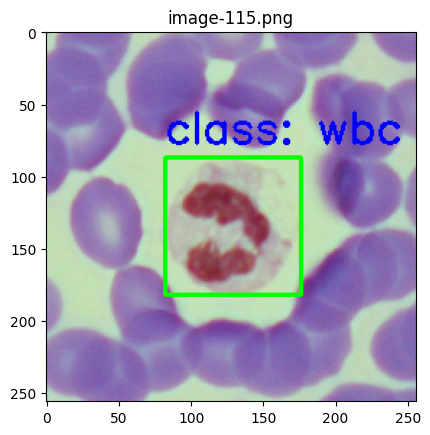

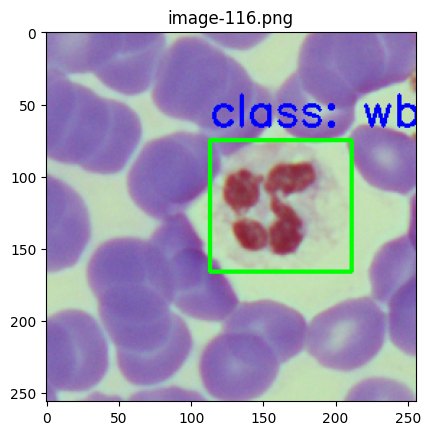

In [19]:
for image_path in os.listdir(IMAGES_PATH)[:20]:
    label_path = os.path.join(YOLO_LABELS_PATH, os.path.splitext(image_path)[0] + ".txt")
    if not os.path.exists(label_path):
        continue
    show_labeled_image(os.path.join(IMAGES_PATH, image_path), label_path, label_map = {"0": "wbc"})